# UMBC DATA606 Capstone –  Predicting Student Startup Success

**Project Title:**  Predicting Student Startup Success Using Team, Innovation, and Support Factors

**Prepared for:** Dr. Chaojie (Jay) Wang  

**Author:** Nirvika Rajendra

**GitHub Repository:** https://github.com/Nirvika12/UMBC-DATA606-Capstone

**LinkedIn Profile:** https://www.linkedin.com/in/nirvika-rajendra-70555b2b2/

---

## Background

This project aims to predict the success of student-led startup projects by leveraging a dataset containing key structural, strategic, and support-related factors. The dataset includes 2,100 student startup initiatives from 40 academic institutions spanning 2019–2023. By understanding which internal factors—such as team experience, innovation level, funding, mentorship, and incubation—drive startup success, the study seeks to develop predictive models that can guide educational institutions and incubators in nurturing effective entrepreneurial ventures.

### Why it Matters?

Student entrepreneurship is an important engine for innovation and economic growth. Successful startup projects lead to job creation, new products and services, and can significantly impact regional economies. This study can help:

1. Identify critical factors contributing to student startup success.

2. Inform institutional policies on mentorship, funding, and incubation programs.

3. Provide actionable insights for educators and startup incubators.

4. Enhance resource allocation to maximize the success rates of student ventures.

### Research Questions:

1. Which project-related factors best predict the success of student-led startups?

2. How do team characteristics (size, experience) influence project outcomes?

3. What role do innovation and technology maturity play in predicting success?

4. How impactful are institutional supports like mentorship and incubation on startup outcomes?

5. Can predictive models built on these factors reliably classify successful vs unsuccessful projects


---

## Data

### Data Source

Kaggle dataset: [Student Startup Success Dataset](https://www.kaggle.com/datasets/ziya07/student-startup-success-dataset/data)

### Data Size and Shape

* ~2,100 records, 16 columns.

* File size: ~176 KB (CSV).

### Time Period

* Dataset sourced from 40 academic institution's startup initiatives, 2019–2023.

### Unit of Observation
Each record corresponds to a single student startup project.

* Each row represents a student record, including academic, extracurricular, personal, and entrepreneurial attributes.

| Column                   | Type        | Description                                       | Possible Values / Range                          |
| ------------------------ | ----------- | ------------------------------------------------- | ------------------------------------------------ |
| `project_id`             | String      | Unique project identifier                         | Alphanumeric (e.g., P0001, P0002, etc.)          |
| `institution_name`       | Categorical | Name of the institution                           | Multiple university/college names                |
| `institution_type`       | Categorical | Type of institution                               | Public, Private, Technical, Non-tech             |
| `project_domain`         | Categorical | Startup domain (sector/industry)                  | AgriTech, FinTech, GreenTech, HealthTech, EdTech |
| `team_size`              | Integer     | Number of students in the startup team            | 1–10+                                            |
| `avg_team_experience`    | Float       | Average years of prior entrepreneurial experience | 0–10                                             |
| `innovation_score`       | Float       | Novelty/originality score normalized (0–1)        | 0–1                                              |
| `funding_amount_usd`     | Float       | Initial funding received in USD                   | 0 – Millions                                     |
| `mentorship_support`     | Binary      | Mentorship received                               | 0 or 1 (1 = Yes, 0 = No)                         |
| `incubation_support`     | Binary      | Whether incubated                                 | 0 or 1 (1 = Yes, 0 = No)                         |
| `market_readiness_level` | Integer     | Stage of product readiness                        | 1–5 (1 = idea, 5 = market-ready)                 |
| `competition_awards`     | Integer     | Number of awards won                              | 0+                                               |
| `business_model_score`   | Float       | Clarity and scalability of business model (0–1)   | 0–1                                              |
| `technology_maturity`    | Integer     | Maturity level of technology                      | 1–5 (1 = prototype, 5 = production)              |
| `year`                   | Integer     | Year project was submitted                        | 2019–2023                                        |
| `success_label`          | Binary      | Target variable: success or failure               | 0 or 1 (1 = Success, 0 = Failure)                |

### Project Scope and Methodology

Target Variable: success_label (binary: 1 = Successful, 0 = Unsuccessful).

Features: All other columns (e.g., funding_amount_usd, innovation_score, team_size, etc.).

## Steps:
1. Exploratory Data Analysis (EDA):

* Analyze feature distributions, missing values, and correlations with success.
* Visualize patterns and trends.

2. Feature Engineering:

* Create new features (e.g., team dynamics, support systems, innovation metrics).
* Normalize/scale continuous features.

3. Model Selection & Training:

* Models: Random Forest, XGBoost, Logistic Regression.
* Tune models with cross-validation.

4. Model Evaluation:

* Evaluate using accuracy, precision, recall, F1-score.
* Compare performance of models.

5. Feature Importance Analysis:

* Identify most influential features (e.g., funding, mentorship support).

6. Practical Implications:

* Insights for universities, incubators to enhance startup support systems.

7. Frontend Application:

* Deploy the model via Streamlit for real-time success predictions and insights.


## 1: Importing Libraries


In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

## 2: Reading and Understanding Data

In [5]:
df = pd.read_csv('student_startup_success_dataset-df.csv')

In [6]:
print("Initial data shape:", df.shape)
df.head()

Initial data shape: (2100, 16)


,project_id,institution_name,institution_type,project_domain,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
0,P0001,Institution_39,Non-technical,AgriTech,3,1.35,0.75,48336.75,1,1,3,3,0.86,4,2023,1
1,P0002,Institution_29,Technical,FinTech,4,1.57,0.38,30601.34,0,0,5,0,0.39,5,2023,0
2,P0003,Institution_15,Non-technical,AgriTech,3,2.19,0.61,37712.58,1,1,1,0,0.38,2,2019,1
3,P0004,Institution_8,Private,GreenTech,7,0.72,0.98,46881.00,1,1,5,1,0.69,5,2021,1
4,P0005,Institution_21,Public,HealthTech,7,2.64,0.33,29988.37,0,0,4,2,0.85,2,2020,0


In [7]:
print("\nColumns and Data Types:")
print(df.dtypes)


Columns and Data Types:
project_id                 object
institution_name           object
institution_type           object
project_domain             object
team_size                   int64
avg_team_experience       float64
innovation_score          float64
funding_amount_usd        float64
mentorship_support          int64
incubation_support          int64
market_readiness_level      int64
competition_awards          int64
business_model_score      float64
technology_maturity         int64
year                        int64
success_label               int64
dtype: object


In [8]:
print("\nUnique Values for each Column:")
df.nunique()


Unique Values for each Column:


project_id                2100
institution_name            40
institution_type             4
project_domain               5
team_size                    6
avg_team_experience        351
innovation_score            71
funding_amount_usd        2100
mentorship_support           2
incubation_support           2
market_readiness_level       5
competition_awards           5
business_model_score        81
technology_maturity          5
year                         5
success_label                2
dtype: int64

In [9]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


## 3: Handling Missing values

In [10]:
df.isnull().sum()

project_id                0
institution_name          0
institution_type          0
project_domain            0
team_size                 0
avg_team_experience       0
innovation_score          0
funding_amount_usd        0
mentorship_support        0
incubation_support        0
market_readiness_level    0
competition_awards        0
business_model_score      0
technology_maturity       0
year                      0
success_label             0
dtype: int64

> No missing values are present in any of the columns.

## 4: Exploratory Data Analysis - EDA

In [11]:
df.head()

,project_id,institution_name,institution_type,project_domain,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
0,P0001,Institution_39,Non-technical,AgriTech,3,1.35,0.75,48336.75,1,1,3,3,0.86,4,2023,1
1,P0002,Institution_29,Technical,FinTech,4,1.57,0.38,30601.34,0,0,5,0,0.39,5,2023,0
2,P0003,Institution_15,Non-technical,AgriTech,3,2.19,0.61,37712.58,1,1,1,0,0.38,2,2019,1
3,P0004,Institution_8,Private,GreenTech,7,0.72,0.98,46881.00,1,1,5,1,0.69,5,2021,1
4,P0005,Institution_21,Public,HealthTech,7,2.64,0.33,29988.37,0,0,4,2,0.85,2,2020,0


| **Group Name**                            | **Columns**                                                           | **What They Represent**                                                           |
| ----------------------------------------- | --------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
|  **Identifiers**                        | `project_id`, `institution_name`                                      | Uniquely identify projects and institutions.                  |
|  **Institution Attributes**             | `institution_type`, `project_domain`                                  | Describe the nature and focus of the institution/project. |
|  **Team Characteristics**               | `team_size`, `avg_team_experience`                                    | Capture human/team factors that may influence project success.                                 |
|  **Performance & Innovation Metrics**   | `innovation_score`, `business_model_score`                            | Reflect creativity, business soundness, or project quality.                                    |
|  **Financial & Support Features**       | `funding_amount_usd`, `mentorship_support`, `incubation_support`      | Represent resource availability or institutional backing.                                      |
|  **Readiness & Achievement Indicators** | `market_readiness_level`, `technology_maturity`, `competition_awards` | Show progress or recognition levels.                                                           |
|  **Time Dimension**                     | `year`                                                                | Enables trend analysis over time.                                                              |
|  **Target Variable**                    | `success_label`                                                       | The outcome variable                                        |


In [12]:
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns

print("Categorical variables:")
print(categorical_vars)

print("\nNumerical variables:")
print(numerical_vars)

Categorical variables:
Index(['project_id', 'institution_name', 'institution_type', 'project_domain'], dtype='object')

Numerical variables:
Index(['team_size', 'avg_team_experience', 'innovation_score',
       'funding_amount_usd', 'mentorship_support', 'incubation_support',
       'market_readiness_level', 'competition_awards', 'business_model_score',
       'technology_maturity', 'year', 'success_label'],
      dtype='object')


In [13]:
print("\nStatistical Summary of the Dataset:")
df.describe()


Statistical Summary of the Dataset:


,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year,success_label
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,4.472381,2.271671,0.650124,25372.473505,0.494762,0.506190,2.962381,1.947143,0.598343,3.062381,2021.062857,0.419524
std,1.709403,1.004748,0.202946,14141.821776,0.500092,0.500081,1.427963,1.391654,0.233342,1.417045,1.460567,0.493599
min,2.000000,0.500000,0.300000,1050.090000,0.000000,0.000000,1.000000,0.000000,0.200000,1.000000,2019.000000,0.000000
25%,3.000000,1.437500,0.480000,13532.472500,0.000000,0.000000,2.000000,1.000000,0.390000,2.000000,2020.000000,0.000000
50%,4.000000,2.290000,0.650000,25216.430000,0.000000,1.000000,3.000000,2.000000,0.600000,3.000000,2021.000000,0.000000
75%,6.000000,3.120000,0.830000,37403.670000,1.000000,1.000000,4.000000,3.000000,0.800000,4.000000,2022.000000,1.000000
max,7.000000,4.000000,1.000000,49982.150000,1.000000,1.000000,5.000000,4.000000,1.000000,5.000000,2023.000000,1.000000


### 4.2: Visual Data Exploration

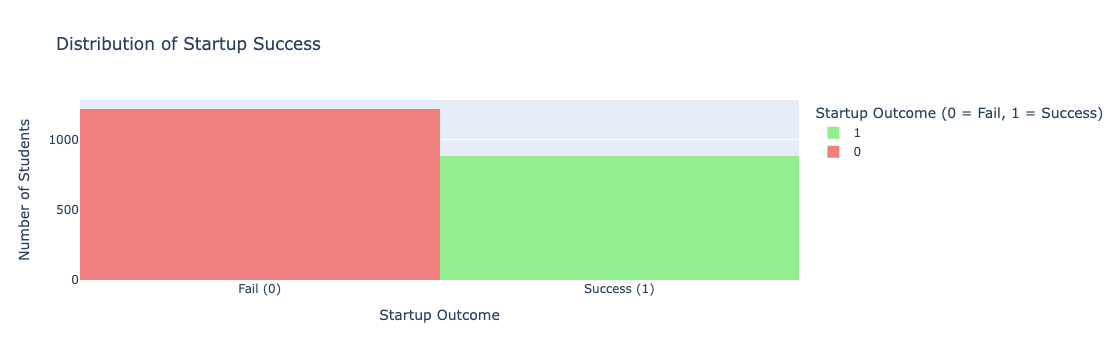

In [14]:
fig = px.histogram(df, x='success_label', color='success_label',
                   title='Distribution of Startup Success',
                   labels={'success_label': 'Startup Outcome (0 = Fail, 1 = Success)', 'count': 'Number of Students'},
                   color_discrete_map={0: 'lightcoral', 1: 'lightgreen'})  

fig.update_layout(
    xaxis_title="Startup Outcome",
    yaxis_title="Number of Students",
    xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Fail (0)', 'Success (1)'])
)
fig.show()

In [15]:
sorted_institution_types = df['institution_type'].value_counts().index

fig1 = px.histogram(df, 
                    x='institution_type', 
                    color='success_label',
                    title='Distribution of Institution Type by Startup Success',
                    labels={'institution_type': 'Institution Type', 
                            'success_label': 'Startup Outcome (0 = Fail, 1 = Success)', 
                            'count': 'Number of Students'},
                    color_discrete_map={0: '#e56060', 1: '#8fbc8f'},
                    category_orders={'institution_type': sorted_institution_types})  # Sorted by counts

fig1.update_layout(
    xaxis_title="Institution Type",
    yaxis_title="Number of Students",
    xaxis=dict(tickmode='array', tickvals=sorted_institution_types)
)

fig1.show()

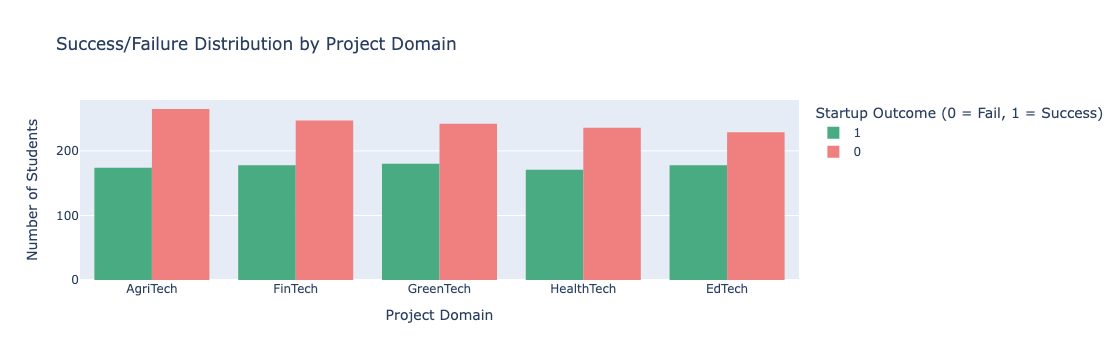

In [16]:
sorted_project_domains = df['project_domain'].value_counts().index

fig = px.histogram(df, 
                   x='project_domain', 
                   color='success_label',
                   title='Success/Failure Distribution by Project Domain',
                   labels={'project_domain': 'Project Domain', 
                           'success_label': 'Startup Outcome (0 = Fail, 1 = Success)', 
                           'count': 'Number of Students'},
                   color_discrete_map={0: 'lightcoral', 1: '#49ab81'},
                   barmode='group',
                   category_orders={'project_domain': sorted_project_domains}) 

fig.update_layout(
    xaxis_title="Project Domain",
    yaxis_title="Number of Students",
    xaxis=dict(tickmode='array', tickvals=sorted_project_domains)
)

fig.show()

In [17]:
df[numerical_vars].nunique()

team_size                    6
avg_team_experience        351
innovation_score            71
funding_amount_usd        2100
mentorship_support           2
incubation_support           2
market_readiness_level       5
competition_awards           5
business_model_score        81
technology_maturity          5
year                         5
success_label                2
dtype: int64

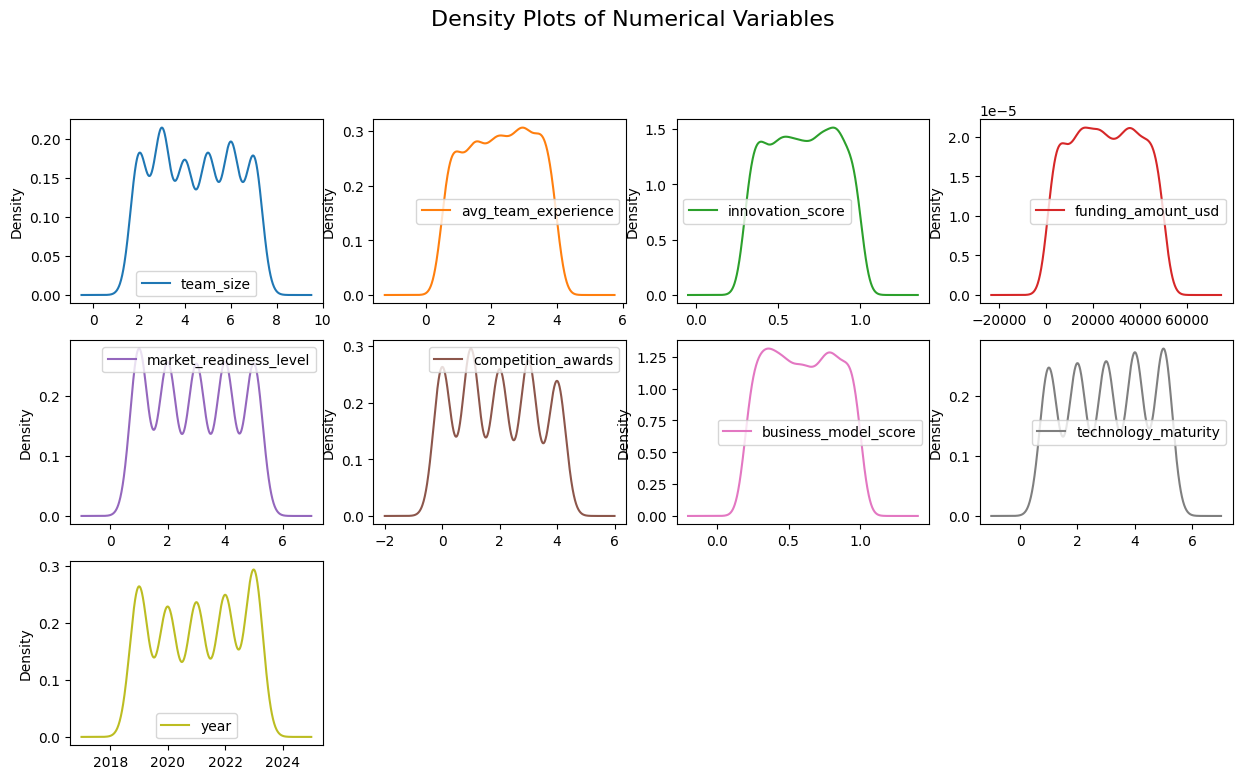

In [18]:
## Proportion of count data on numerical columns
numerical_vars_filtered = [col for col in numerical_vars if df[col].nunique() > 2]

df[numerical_vars_filtered].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 11))
plt.suptitle("Density Plots of Numerical Variables", fontsize=16)
plt.show()

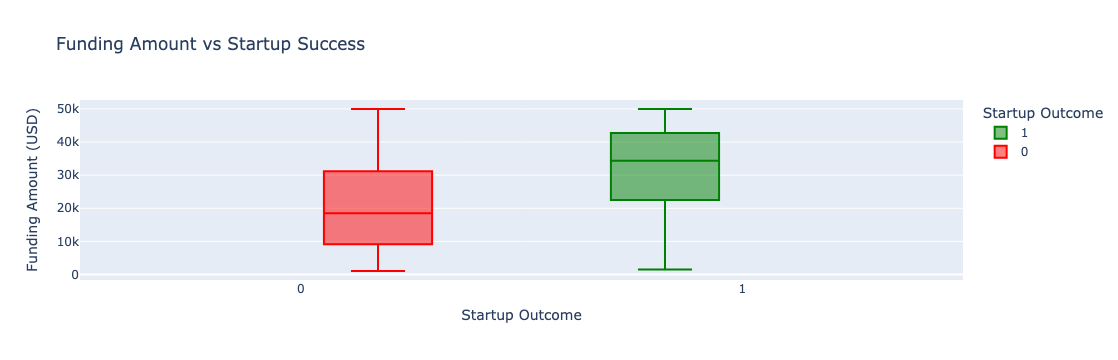

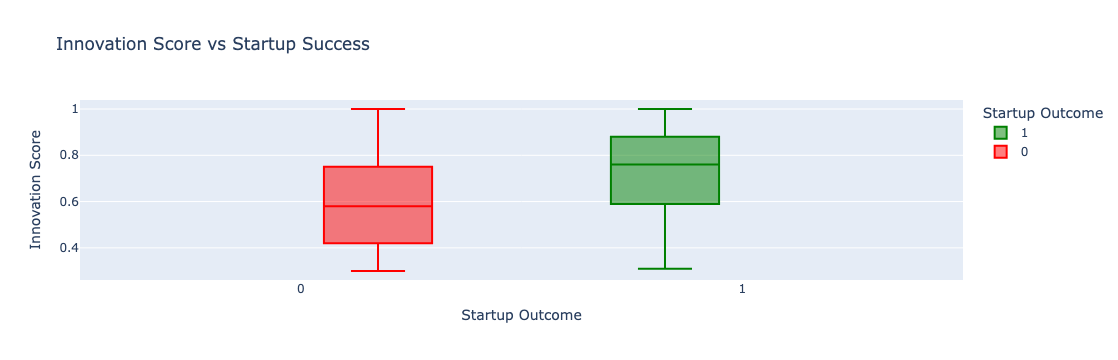

In [19]:
fig1 = px.box(df, x='success_label', y='funding_amount_usd',
              title='Funding Amount vs Startup Success',
              labels={'success_label': 'Startup Outcome', 'funding_amount_usd': 'Funding Amount (USD)'},
              color='success_label', 
              color_discrete_map={0: 'red', 1: 'green'},
              boxmode='group')  
fig1.show()

fig2 = px.box(df, x='success_label', y='innovation_score',
              title='Innovation Score vs Startup Success',
              labels={'success_label': 'Startup Outcome', 'innovation_score': 'Innovation Score'},
              color='success_label',
              color_discrete_map={0: 'red', 1: 'green'},
              boxmode='group') 
fig2.show()

In [20]:
fig1 = go.Figure()

fig1.add_trace(go.Histogram(
    x=df[df['success_label'] == 0]['avg_team_experience'], 
    histnorm='density',
    name='Failure',
    opacity=0.6, 
    nbinsx=20,  
    marker_color='#e34234', 
    legendgroup='Failure'
))

fig1.add_trace(go.Histogram(
    x=df[df['success_label'] == 1]['avg_team_experience'], 
    histnorm='density',
    name='Success',
    opacity=0.6,  
    nbinsx=20,  
    marker_color='green',  
    legendgroup='Success'
))

fig1.update_layout(
    title="KDE Plot for Average Team Experience by Startup Success",
    xaxis_title="Average Team Experience",
    yaxis_title="Density",
    barmode='overlay',
    legend_title="Startup Outcome",
    template="plotly_white"
)

fig1.show()

<Axes: xlabel='business_model_score', ylabel='Density'>

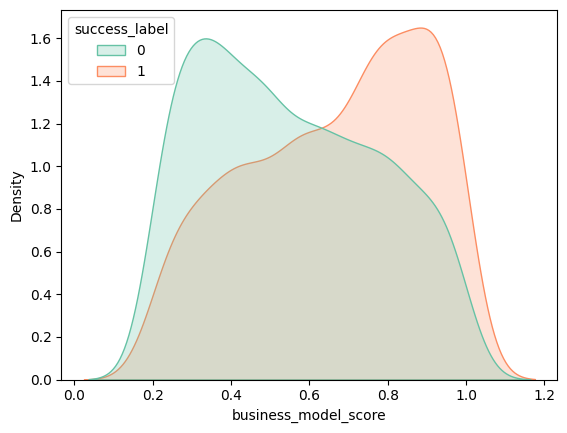

In [21]:
sns.kdeplot(data=df, x='business_model_score', hue='success_label', common_norm=False, fill=True, palette='Set2')


In [22]:
numeric_vars = [ 'avg_team_experience', 'innovation_score', 'funding_amount_usd',
                 'market_readiness_level','business_model_score','technology_maturity' ]

cols_per_row = 3
rows = (len(numeric_vars) + cols_per_row - 1) // cols_per_row  # Calculate rows

fig = make_subplots(
    rows=rows, cols=cols_per_row,
    subplot_titles=numeric_vars,
    horizontal_spacing=0.05, vertical_spacing=0.15
)

status_properties = {
    0: {'name': 'Fail (0)', 'color': 'red'}, 
    1: {'name': 'Success (1)', 'color': 'green'}  
}


for i, col in enumerate(numeric_vars):
    avg_df = df.groupby(['year', 'success_label'], as_index=False)[col].mean()

    row = (i // cols_per_row) + 1  
    col_pos = (i % cols_per_row) + 1

    for success_label, properties in status_properties.items():
        show_legend = (i == 0 and success_label == 0) or (i == 0 and success_label == 1)
        
        fig.add_trace(
            go.Scatter(
                x=avg_df[avg_df['success_label'] == success_label]['year'],
                y=avg_df[avg_df['success_label'] == success_label][col],
                mode='lines+markers',
                name=properties['name'],
                line=dict(color=properties['color']),
                legendgroup=properties['name'],  
                showlegend=show_legend  
            ),
            row=row, col=col_pos
        )

    fig.update_yaxes(title_text=col, row=row, col=col_pos)

fig.update_layout(
    height=400 * rows, 
    width=350 * cols_per_row, 
    title_text='Trends of Numeric Features Over Years by Project Success',
    showlegend=True,  
)

fig.show()


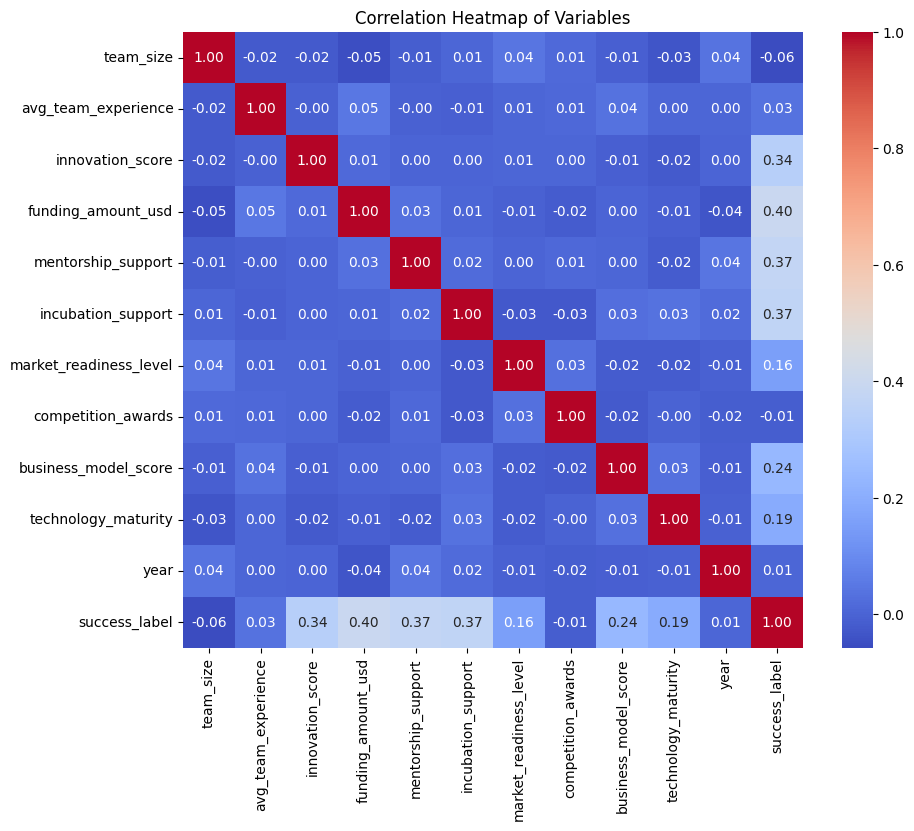

In [23]:
# Compute the correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

### 4.3: Key Descriptive Insights : Factors Influencing Project Success

#### 1. Descriptive Statistics for Failed Projects

In [24]:
df_fail = df[df['success_label'] == 0]

desc_fail = df_fail.drop(columns=['success_label']).describe().round(2)
desc_fail

,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year
count,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00,1219.00
mean,4.56,2.24,0.59,20621.67,0.34,0.35,2.77,1.96,0.55,2.83,2021.05
std,1.70,1.00,0.20,13217.39,0.47,0.48,1.40,1.39,0.23,1.40,1.46
min,2.00,0.50,0.30,1050.09,0.00,0.00,1.00,0.00,0.20,1.00,2019.00
25%,3.00,1.42,0.42,9141.50,0.00,0.00,1.00,1.00,0.35,2.00,2020.00
50%,5.00,2.25,0.58,18456.40,0.00,0.00,3.00,2.00,0.52,3.00,2021.00
75%,6.00,3.08,0.75,31157.12,1.00,1.00,4.00,3.00,0.73,4.00,2022.00
max,7.00,4.00,1.00,49982.15,1.00,1.00,5.00,4.00,1.00,5.00,2023.00


>  Most failed projects had a team size around 5, moderate innovation score (0.58), and average funding of 20,621 usd. Funding varies widely, with the highest-funded failed project receiving nearly $50,000. Failed projects are distributed across 2019–2023, with many receiving low mentorship and incubation support.

#### 2. Descriptive Statistics for Successful Projects

In [25]:
df_success = df[df['success_label'] == 1]

# Describe successful projects
desc_success = df_success.drop(columns=['success_label']).describe().round(2)
desc_success

,team_size,avg_team_experience,innovation_score,funding_amount_usd,mentorship_support,incubation_support,market_readiness_level,competition_awards,business_model_score,technology_maturity,year
count,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00,881.00
mean,4.36,2.31,0.73,31945.95,0.71,0.72,3.22,1.92,0.66,3.39,2021.07
std,1.72,1.01,0.18,12676.74,0.45,0.45,1.43,1.40,0.23,1.37,1.46
min,2.00,0.50,0.31,1507.82,0.00,0.00,1.00,0.00,0.20,1.00,2019.00
25%,3.00,1.45,0.59,22543.13,0.00,0.00,2.00,1.00,0.47,2.00,2020.00
50%,4.00,2.34,0.76,34327.00,1.00,1.00,3.00,2.00,0.70,4.00,2021.00
75%,6.00,3.17,0.88,42709.16,1.00,1.00,5.00,3.00,0.86,5.00,2022.00
max,7.00,4.00,1.00,49968.88,1.00,1.00,5.00,4.00,1.00,5.00,2023.00


> Most successful projects had a team size around 4 and slightly higher average team experience (2.31) compared to failed projects. The average innovation score is 0.73, higher than failures, and average funding is $31,946, indicating that successful projects tend to receive more financial support. Mentorship and incubation support are considerably higher (averages ~0.71–0.72), suggesting strong guidance contributes to success. Market readiness level averages 3.22, higher than failed projects, showing successful projects are generally better prepared for the market. Projects are distributed across 2019–2023, with most falling near the median year 2021.

#### 3. Aggregated Metrics for Successful Projects by Domain

In [26]:
df_success = df[df['success_label'] == 1]

# Group by project_domain and calculate aggregated stats
domain_success_stats = df_success.groupby('project_domain').agg({
    'team_size': 'median',
    'innovation_score': 'mean',
    'funding_amount_usd': 'mean',
    'avg_team_experience': 'mean',
}).reset_index()

# Optional: round for readability
domain_success_stats = domain_success_stats.round(2)

domain_success_stats

,project_domain,team_size,innovation_score,funding_amount_usd,avg_team_experience
0,AgriTech,4.0,0.73,33175.26,2.35
1,EdTech,4.0,0.75,31801.39,2.30
2,FinTech,4.0,0.72,31668.31,2.27
3,GreenTech,4.0,0.74,31234.39,2.25
4,HealthTech,4.0,0.71,31883.56,2.39


> 1. Team Size: Median is 4 across all domains, moderately sized teams are common.
> 2. Innovation Score: 0.71–0.75, all domains show relatively high innovation.
> 3.  Funding: `$31k–$33k`, typical successful projects receive substantial funding.
> 4.  Team Experience: 2.25–2.39, moderately experienced teams are typical.

> Overall: Success is associated with balanced team size & experience, strong innovation, and decent funding, consistent across domains.

#### 4. Aggregated Metrics for Successful Projects by Institution Type

In [27]:
df_success.groupby(['institution_type']).agg({
    'team_size': 'median',
    'innovation_score': 'mean',
    'funding_amount_usd': 'mean',
    'avg_team_experience': 'mean',
}).reset_index()

,institution_type,team_size,innovation_score,funding_amount_usd,avg_team_experience
0,Non-technical,4.0,0.739438,32511.487952,2.249920
1,Private,4.0,0.722591,32582.296891,2.338601
2,Public,4.0,0.740837,31362.536476,2.395066
3,Technical,4.0,0.718208,31327.077689,2.269906


> 1. Team Size: Median is 4 across all institution types → moderately sized teams are common.
> 2. Innovation Score: 0.72–0.74 → Public and Non-technical institutions show slightly higher innovation.
> 3. Funding: `$31k–$32.5k` → typical successful projects receive similar funding across institutions.
> 4.  Team Experience: 2.25–2.40 → moderately experienced teams are typical, with Public institutions slightly higher.

> Overall: Success is generally associated with balanced team size, strong innovation, and moderate funding, with Public and Non-technical institutions slightly stronger in innovation and experience.

#### 5. Project Success and Failure Counts by Institution Type

In [28]:
success_failure_counts = df.groupby(['institution_type', 'success_label'])['project_id'].count().unstack(fill_value=0)
success_failure_counts = success_failure_counts.sort_values(by=1, ascending=False)
success_failure_counts

success_label,0,1
institution_type,,
Non-technical,300,249
Public,319,227
Technical,296,212
Private,304,193


> 1. Non-technical institutions lead in project success with a success rate of ≈45%, indicating slightly better performance. 
> 2. Public and Technical institutions show moderate, similar success rates of ≈42%,
> 3. While Private institutions lag behind at ≈39% despite running a substantial number of projects.
> 4. This suggests that institution type may influence project outcomes, with Non-technical institutions performing slightly better.

### Next steps:

> 1. Proceeding to Model Training using both original and engineered features.
> 2. Splitting the dataset into training and test sets (80/20) for unbiased evaluation.
> 3. Appling and compare multiple machine-learning models such as Logistic Regression, Random Forest, and XGBoost.
> 4. To use key metrics — Accuracy, Precision, Recall, F1-Score, and ROC-AUC — to assess model performance.
> 5. Perform feature importance analysis to identify which factors most strongly drive startup success.

> Once the best-performing model is selected, develop an interactive Streamlit web app that allows users to input startup attributes and receive real-time success predictions.